<h1 style = "background-color:skyblue;font-family:Georgia;font-size:350%;text-align:center">Import Libraries</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-darkgrid")
import warnings
warnings.filterwarnings('ignore')

<h1 style = "background-color:skyblue;font-family:Georgia;font-size:350%;text-align:center">Import Dataset</h1>

In [2]:
data = pd.read_csv("telecom_users.csv")

<h1 style = "background-color:skyblue;font-family:Georgia;font-size:350%;text-align:center">Exploratory Data Analysis</h1>

In [3]:
data.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,5986.0,3533.561310,2035.705666,0.00,1777.25,3546.5,5291.75,7042.00
SeniorCitizen,5986.0,0.161377,0.367909,0.00,0.00,0.0,0.00,1.00
tenure,5986.0,32.468760,24.516391,0.00,9.00,29.0,56.00,72.00
MonthlyCharges,5986.0,64.802213,30.114702,18.25,35.65,70.4,89.90,118.75


<h1 style = "background-color:skyblue;font-family:Georgia;font-size:350%;text-align:center">Categorical Variable Analysis</h1>

In [6]:
def categorical(columns):
    plt.figure(figsize = (15,7))
    plt.subplot(1,2,1)
    plt.pie(x = data[columns].value_counts(), labels = data[columns].value_counts().index, autopct="%.1f%%", pctdistance =0.7)
    plt.subplot(1, 2, 2)
    sns.countplot(x = columns, data = data, hue = "Churn")
    plt.show()
    print(data[columns].value_counts())

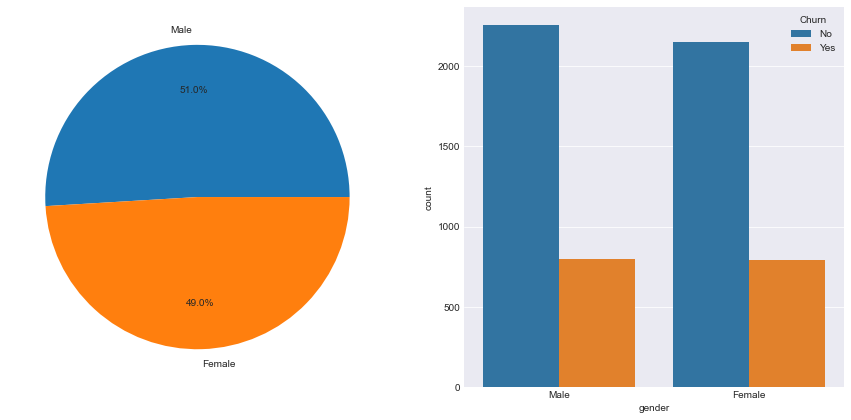

Male      3050
Female    2936
Name: gender, dtype: int64
None


In [7]:
print(categorical("gender"))

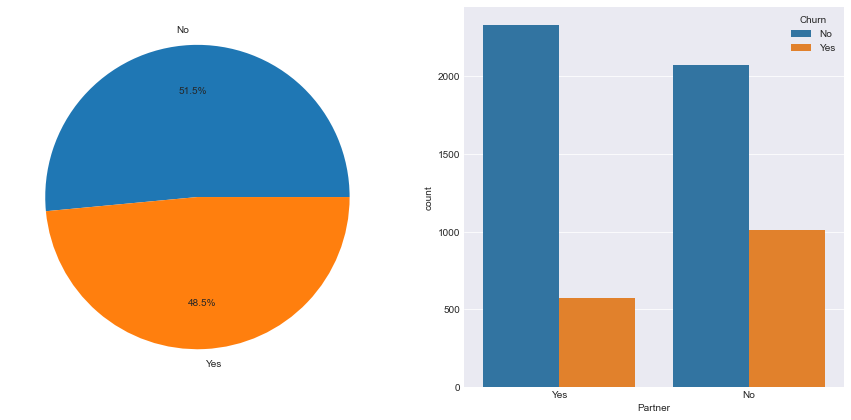

No     3082
Yes    2904
Name: Partner, dtype: int64


In [8]:
categorical("Partner")

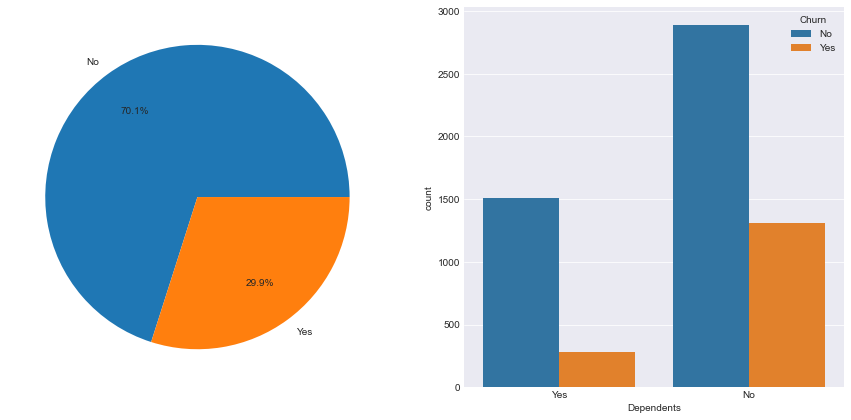

No     4195
Yes    1791
Name: Dependents, dtype: int64


In [9]:
categorical("Dependents")

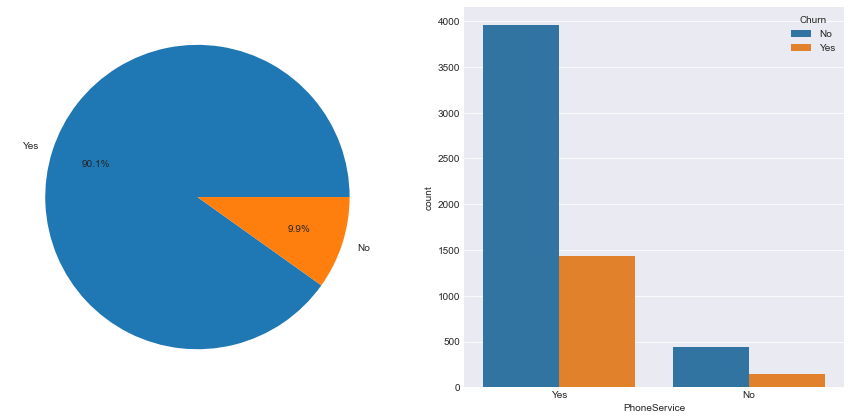

Yes    5396
No      590
Name: PhoneService, dtype: int64


In [10]:
categorical("PhoneService")

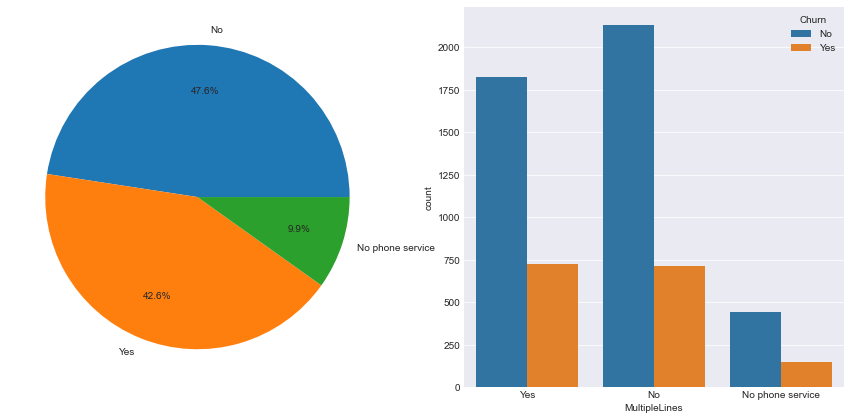

No                  2848
Yes                 2548
No phone service     590
Name: MultipleLines, dtype: int64


In [11]:
categorical("MultipleLines")

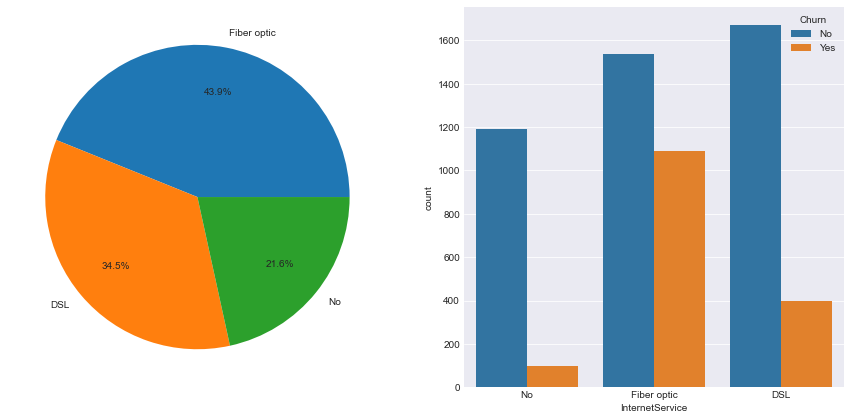

Fiber optic    2627
DSL            2068
No             1291
Name: InternetService, dtype: int64


In [12]:
categorical("InternetService")

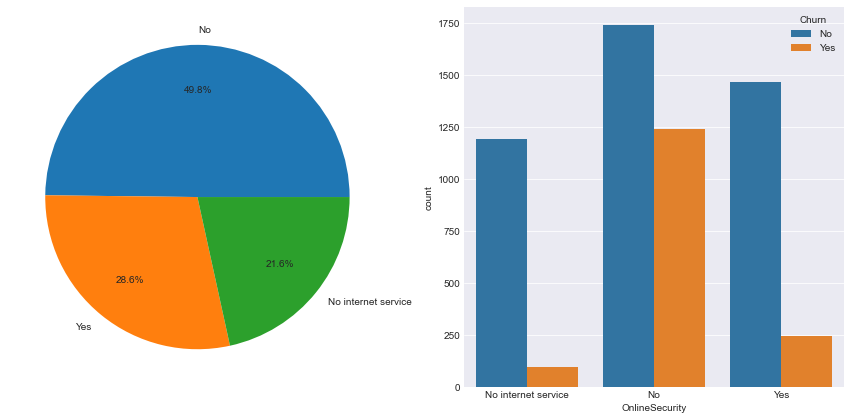

No                     2982
Yes                    1713
No internet service    1291
Name: OnlineSecurity, dtype: int64


In [13]:
categorical("OnlineSecurity")

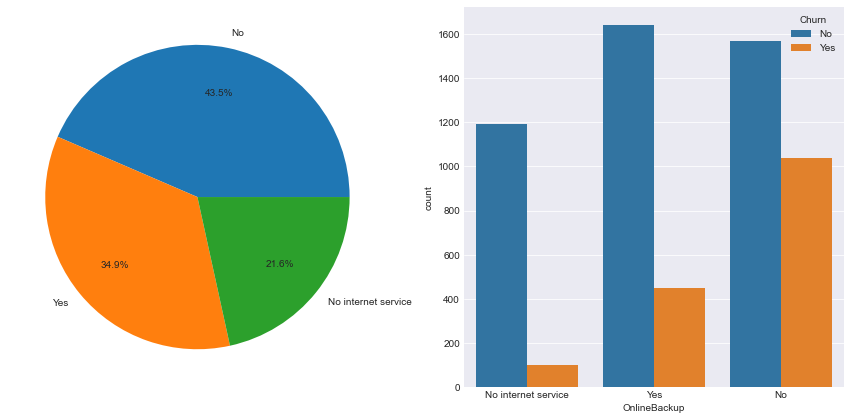

No                     2605
Yes                    2090
No internet service    1291
Name: OnlineBackup, dtype: int64


In [14]:
categorical("OnlineBackup")

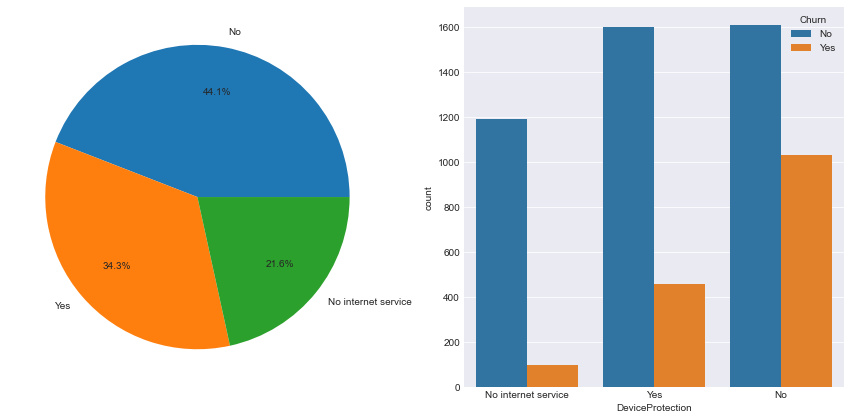

No                     2640
Yes                    2055
No internet service    1291
Name: DeviceProtection, dtype: int64


In [15]:
categorical("DeviceProtection")

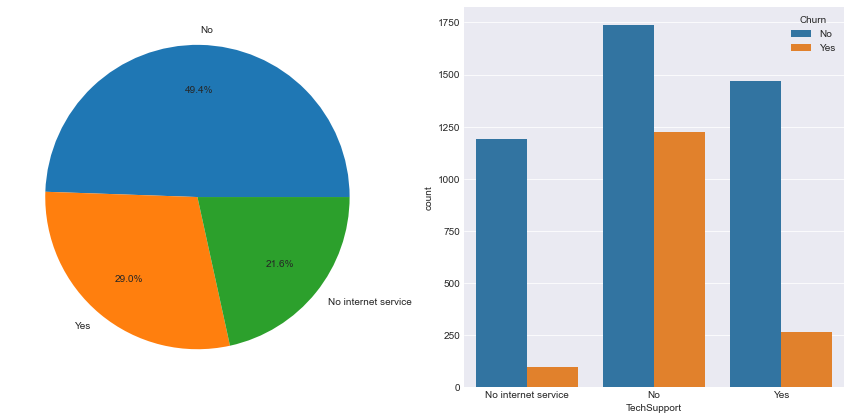

No                     2960
Yes                    1735
No internet service    1291
Name: TechSupport, dtype: int64


In [16]:
categorical("TechSupport")

<h1 style = "background-color:skyblue;font-family:Georgia;font-size:350%;text-align:center">Numeric Variable Analysis</h1>

In [17]:
def numeric(columns, discrete = False):
    if discrete:
        plt.figure(figsize = (7,5))
        sns.countplot(x = columns, data = data, hue = "Churn")
        plt.show()
    else:
        plt.figure(figsize = (15,7))
        sns.jointplot(x = columns, y = "Churn", data = data, kind = "reg")
        
data["Churn"] = [1 if i == "Yes" else 0 for i in data["Churn"]]

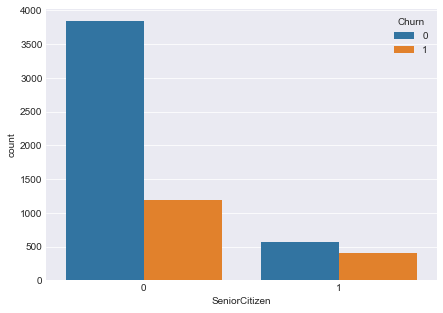

In [18]:
numeric("SeniorCitizen", True)

<Figure size 1080x504 with 0 Axes>

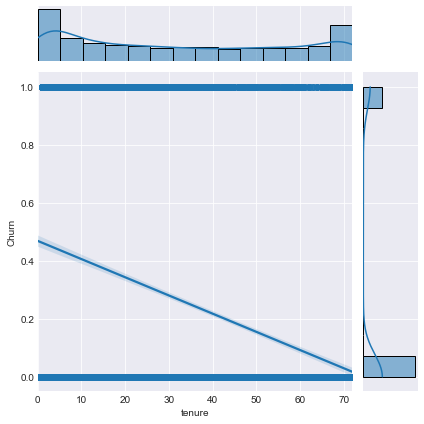

In [19]:
numeric("tenure")

<Figure size 1080x504 with 0 Axes>

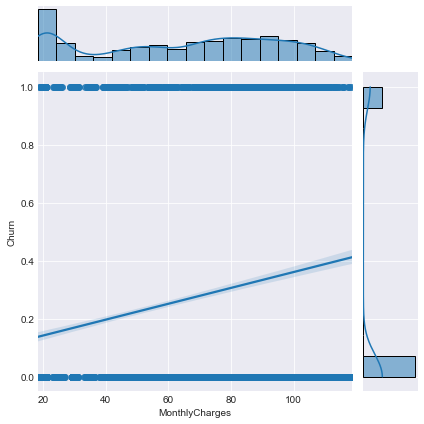

In [20]:
numeric("MonthlyCharges")

In [21]:
data.TotalCharges = pd.to_numeric(data.TotalCharges, errors='coerce')

<Figure size 1080x504 with 0 Axes>

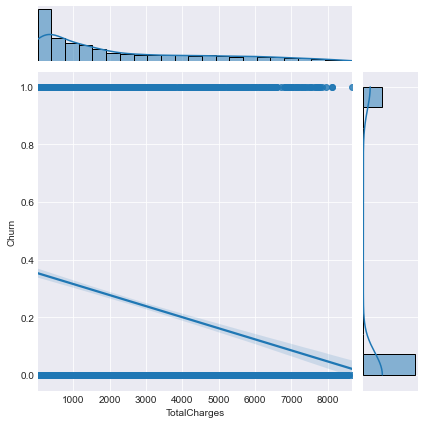

In [22]:
numeric("TotalCharges")

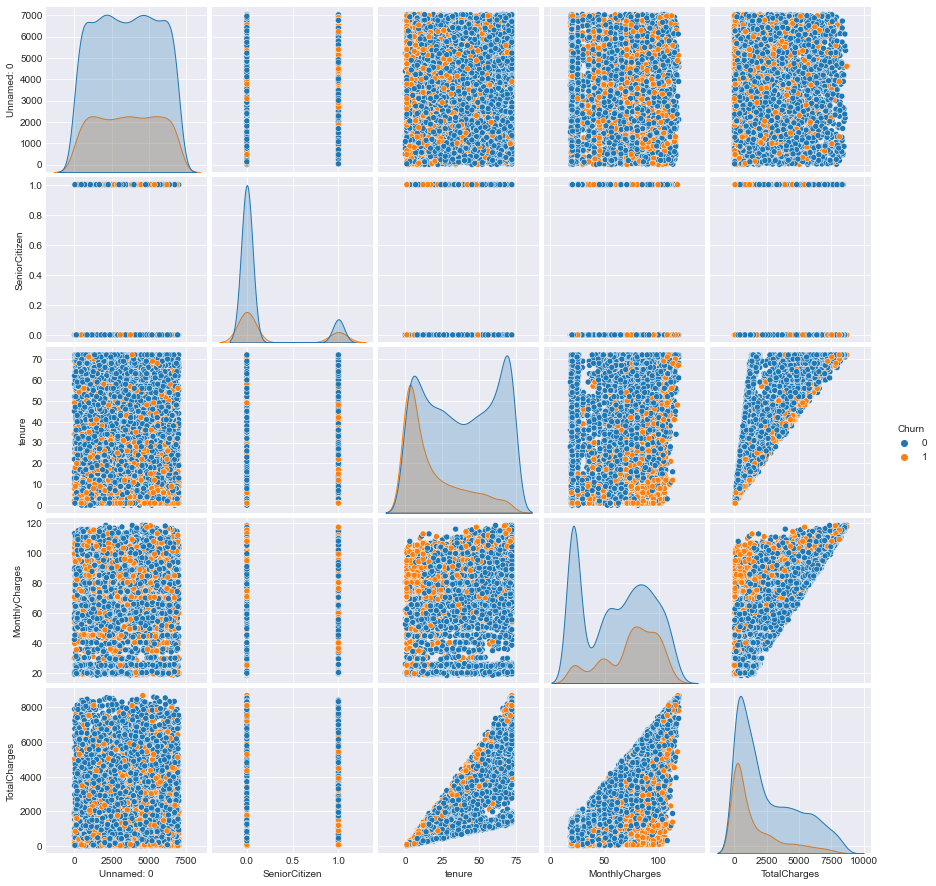

In [23]:
sns.pairplot(data, hue = "Churn")

<h1 style = "background-color:skyblue;font-family:Georgia;font-size:350%;text-align:center">Missing Value</h1>

In [24]:
data.isnull().sum()

Unnamed: 0           0
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        10
Churn                0
dtype: int64

In [25]:
data["TotalCharges"].fillna(data["TotalCharges"].mean(), inplace = True)

<h1 style = "background-color:skyblue;font-family:Georgia;font-size:350%;text-align:center">Feature Engineering</h1>

In [26]:
categorical_val = data.select_dtypes(["object"])
for i in categorical_val.columns:
    print(i)
    print(data[i].value_counts())
    print("------------------")

customerID
5583-SXDAG    1
9347-AERRL    1
1264-BYWMS    1
2634-HCZGT    1
5003-OKNNK    1
             ..
6631-HMANX    1
2129-ALKBS    1
3312-UUMZW    1
2332-TODQS    1
6351-SCJKT    1
Name: customerID, Length: 5986, dtype: int64
------------------
gender
Male      3050
Female    2936
Name: gender, dtype: int64
------------------
Partner
No     3082
Yes    2904
Name: Partner, dtype: int64
------------------
Dependents
No     4195
Yes    1791
Name: Dependents, dtype: int64
------------------
PhoneService
Yes    5396
No      590
Name: PhoneService, dtype: int64
------------------
MultipleLines
No                  2848
Yes                 2548
No phone service     590
Name: MultipleLines, dtype: int64
------------------
InternetService
Fiber optic    2627
DSL            2068
No             1291
Name: InternetService, dtype: int64
------------------
OnlineSecurity
No                     2982
Yes                    1713
No internet service    1291
Name: OnlineSecurity, dtype: int64
------

In [27]:
data["gender"] = [1 if i == "Male" else 0 for i in data.gender]
data["Partner"] = [1 if i == "Yes" else 0 for i in data.Partner]
data["Dependents"] = [1 if i == "Yes" else 0 for i in data.Dependents]
data["PhoneService"] = [1 if i == "Yes" else 0 for i in data.PhoneService]
data["PaperlessBilling"] = [1 if i == "Yes" else 0 for i in data.PaperlessBilling]

In [28]:
data.drop(["Unnamed: 0", "customerID"], axis = 1, inplace = True)

In [29]:
data = pd.get_dummies(data)

In [30]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMetho

<h1 style = "background-color:skyblue;font-family:Georgia;font-size:350%;text-align:center">Machine Learning Models</h1>

In [50]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier

In [46]:
x = data.drop(["Churn"], axis = 1)
y = data.Churn.values.reshape(-1,1)

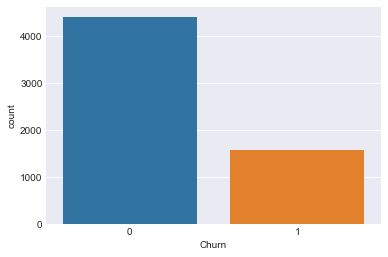

In [34]:
#Let's see weather our dataset is balanced or imbalanced
sns.countplot(data.Churn);

In [35]:
smote = SMOTE(random_state = 42)
x_smote, y_smote = smote.fit_resample(x,y)

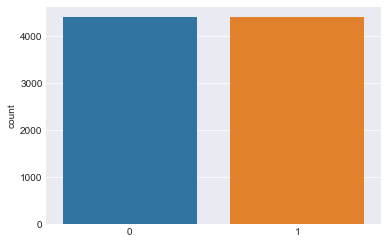

In [36]:
sns.countplot(y_smote);

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size = 0.2 ,random_state = 42)

In [38]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [53]:
classifier = [DecisionTreeClassifier(random_state = 42),
              SVC(random_state = 42),
              RandomForestClassifier(random_state = 42),
              LogisticRegression(random_state = 42),
              KNeighborsClassifier(),
              CatBoostClassifier(random_state = 42)]

In [54]:
dt_param_grid = {"min_samples_split" : range(10,500,20),
                "max_depth": range(1,20,2)}

svc_param_grid = {"kernel" : ["rbf"],
                 "gamma": [0.001, 0.01, 0.1, 1],
                 "C": [1,10,50,100,200,300,1000]}

rf_param_grid = {"max_features": [1,3,10],
                "min_samples_split":[2,3,10],
                "min_samples_leaf":[1,3,10],
                "bootstrap":[False],
                "n_estimators":[100,300],
                "criterion":["gini"]}

logreg_param_grid = {"C":np.logspace(-3,3,7),
                    "penalty": ["l1","l2"]}

knn_param_grid = {"n_neighbors": np.linspace(1,19,10, dtype = int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan"]}

cat_params = {"iterations" : [200,500],
             "learning_rate" : [0.01, 0.05, 0.1],
             "depth" : [3,5,8]}

In [55]:
classifier_param = [dt_param_grid,
                    svc_param_grid,
                    rf_param_grid,
                    logreg_param_grid,
                    knn_param_grid,
                    cat_params]

In [57]:
cv_results = []
best_estimators = []

for i in range(len(classifier)):
    gr = GridSearchCV(classifier[i], param_grid= classifier_param[i], 
                      cv = StratifiedKFold(n_splits = 5), scoring = "accuracy",
                      n_jobs = -1,verbose = 1)
    model = gr.fit(x_train, y_train)
    cv_results.append(model.best_score_)
    best_estimators.append(model.best_estimator_)
    print(cv_results[i])
    print(best_estimators[i])

Fitting 5 folds for each of 250 candidates, totalling 1250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 1000 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 1250 out of 1250 | elapsed:    4.2s finished


0.8304897993797248
DecisionTreeClassifier(max_depth=11, min_samples_split=30, random_state=42)
Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:  1.1min finished


0.8492455538864121
SVC(C=200, gamma=0.001, random_state=42)
Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   33.7s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:  1.2min finished


0.8552148954900822
RandomForestClassifier(bootstrap=False, max_features=10, min_samples_leaf=3,
                       n_estimators=300, random_state=42)
Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  47 out of  70 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    0.6s finished


0.8512350988563675
LogisticRegression(C=100.0, random_state=42)
Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   19.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   22.3s finished


0.8286408864767075
KNeighborsClassifier(metric='euclidean', n_neighbors=17)
Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   45.3s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  5.0min finished


0:	learn: 0.6597327	total: 150ms	remaining: 29.8s
1:	learn: 0.6355209	total: 168ms	remaining: 16.6s
2:	learn: 0.6130454	total: 191ms	remaining: 12.5s
3:	learn: 0.5910647	total: 208ms	remaining: 10.2s
4:	learn: 0.5739912	total: 235ms	remaining: 9.18s
5:	learn: 0.5594923	total: 254ms	remaining: 8.22s
6:	learn: 0.5411775	total: 274ms	remaining: 7.55s
7:	learn: 0.5242523	total: 300ms	remaining: 7.2s
8:	learn: 0.5123451	total: 320ms	remaining: 6.79s
9:	learn: 0.5033872	total: 357ms	remaining: 6.79s
10:	learn: 0.4949270	total: 374ms	remaining: 6.42s
11:	learn: 0.4837507	total: 390ms	remaining: 6.11s
12:	learn: 0.4717482	total: 418ms	remaining: 6.01s
13:	learn: 0.4640535	total: 434ms	remaining: 5.76s
14:	learn: 0.4577478	total: 452ms	remaining: 5.58s
15:	learn: 0.4482084	total: 468ms	remaining: 5.38s
16:	learn: 0.4425374	total: 487ms	remaining: 5.24s
17:	learn: 0.4347847	total: 502ms	remaining: 5.08s
18:	learn: 0.4300504	total: 524ms	remaining: 4.99s
19:	learn: 0.4261938	total: 530ms	remainin

193:	learn: 0.2901967	total: 2.08s	remaining: 64.5ms
194:	learn: 0.2899993	total: 2.09s	remaining: 53.6ms
195:	learn: 0.2898022	total: 2.1s	remaining: 42.8ms
196:	learn: 0.2896477	total: 2.11s	remaining: 32.1ms
197:	learn: 0.2894196	total: 2.12s	remaining: 21.4ms
198:	learn: 0.2892795	total: 2.12s	remaining: 10.7ms
199:	learn: 0.2890329	total: 2.13s	remaining: 0us
0.8549294921496415


In [63]:
# Model Selection
df = pd.DataFrame({"Cross Validation" : cv_results,
                  "Ml_models" : ["DT", "SVM", "RF", "LR", "KNN", "CATB"]})

<AxesSubplot:xlabel='Cross Validation', ylabel='Ml_models'>

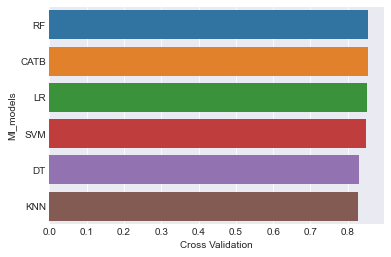

In [65]:
sns.barplot(x = "Cross Validation", y = "Ml_models", data = df, order = df.sort_values("Cross Validation", ascending = False).Ml_models)

The best ml models is Random Forest

In [75]:
rf_tuned = best_estimators[2]
model = rf_tuned.fit(x_train, y_train)

In [76]:
# Test Accuracy
y_head = model.predict(x_test)
accuracy_score(y_test, y_head)

0.8590909090909091

In [78]:
print(classification_report(y_test, y_head))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86       900
           1       0.86      0.85      0.85       860

    accuracy                           0.86      1760
   macro avg       0.86      0.86      0.86      1760
weighted avg       0.86      0.86      0.86      1760



In [79]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_head)

<AxesSubplot:>

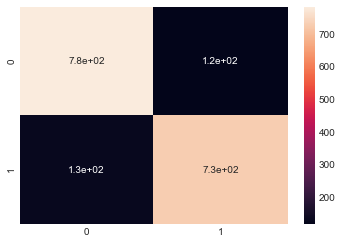

In [84]:
sns.heatmap(cm, annot = True)